In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.svm import SVC

## github_dataset
###  数据摘要和可视化
- 数据摘要

In [2]:
source_file1 = "./github_dataset.csv"


data1 = pd.read_csv(source_file1)

nominal_attributes = ['repositories', 'language']
numeric_attributes = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']

source_file2 = "./movies_dataset.csv"

def analysis_github_statistics(file, nominal_analysis = True):
    data = pd.read_csv(file)
    
    if nominal_analysis:
        # 标称属性频数统计
        print('=======================================')
        print('标称属性频数统计')
        for attr in nominal_attributes:
            print('-----', attr, '-----')
            vc = data[attr].value_counts()
            print(vc[:30])

        patten = re.compile(r'\d+')

    # 数值属性统计
    print('=======================================')
    print('数值属性缺失值统计')
    numeric_data = pd.DataFrame(data, columns=numeric_attributes)
    numeric_data.info()
    for i in numeric_attributes:
        print(i, "缺失值")
        print(numeric_data[i].isna().sum())
    print('=======================================')
    print('标称属性缺失值统计')
    nominal_data = pd.DataFrame(data, columns=nominal_attributes)
    nominal_data.info()
    for i in nominal_attributes:
        print(i, "缺失值")
        print(nominal_data[i].isna().sum())
    print('=======================================')
    print('5数概括')
    print(numeric_data.describe(include='all'))

analysis_github_statistics(source_file1)


标称属性频数统计
----- repositories -----
kameshsampath/ansible-role-rosa-demos                        2
aloisdeniel/bluff                                            2
antoniaandreou/github-slideshow                              2
jgthms/bulma-start                                           2
artkirienko/hlds-docker-dproto                               2
artkirienko/int-null-even                                    2
KrauseFx/dotfiles                                            2
carloscuesta/gitmoji                                         2
divyamagwl/Depocalypse                                       2
ritwickdey/Cake-Shop                                         2
ritwickdey/expensify-app                                     2
stong/infosec-resources                                      2
KrauseFx/certs                                               2
KrauseFx/doesitrain.today                                    2
kameshsampath/ansible-role-kind                              2
ritwickdey/ritwickdey

- 数据可视化

In [3]:
def draw_bar(data_dict, bin_dict):
    for key in data_dict:
        list_ = data_dict[key]
        plt.hist(list_, bins=bin_dict[key], color='skyblue')
        plt.title(key)
        plt.xlabel(key)
        plt.ylabel('rate')
        plt.show()

def draw_box(data_dict):
    for key in data_dict:
        list_ = data_dict[key]
        df = pd.DataFrame(list_)
        df.plot.box(title=key)
        plt.show()

直方图

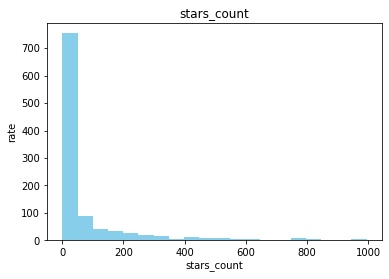

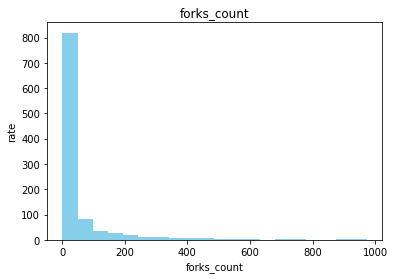

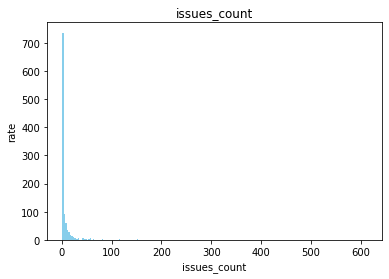

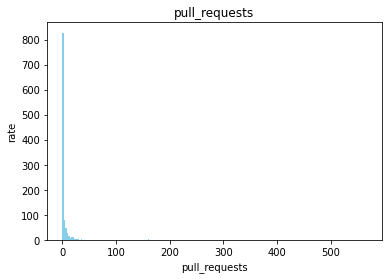

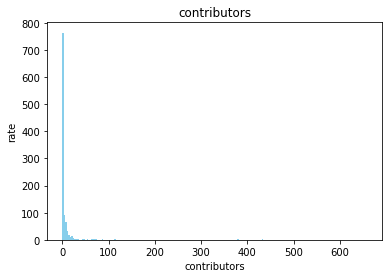

In [4]:
bin_dict = {'stars_count':20, 'forks_count':20, 'issues_count':200, 'pull_requests':200, 'contributors':200}
data_dict = {'stars_count': data1['stars_count'].to_list(), 
             'forks_count': data1['forks_count'].to_list(),
             'issues_count': data1['issues_count'].to_list(),
             'pull_requests': data1['pull_requests'].to_list(),
             'contributors': data1['contributors'].to_list()}
draw_bar(data_dict, bin_dict)

盒图

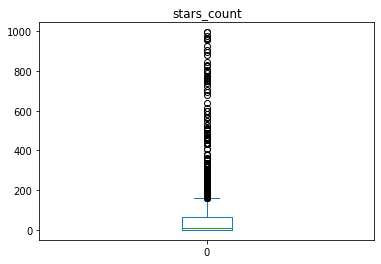

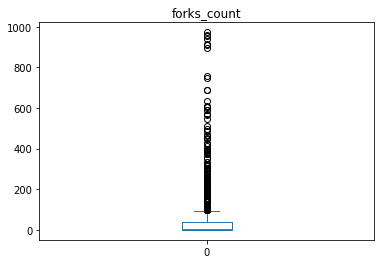

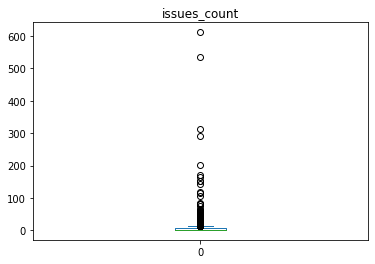

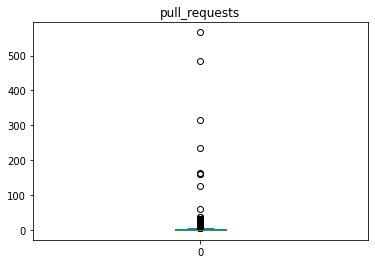

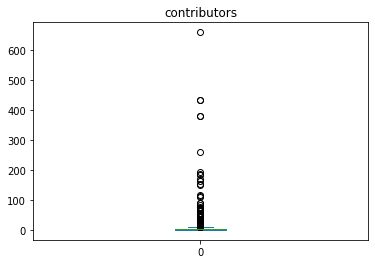

In [5]:
draw_box(data_dict)

各个数值属性数据均呈现单峰分部模态，离群点较多，均值与最值差距较大。

## 数据缺失的处理
数值属性不存在缺失值，因此关注标称属性
- 将缺失部分剔除

In [6]:
def analysis_github(filename):
    analysis_github_statistics(filename)
    bin_dict = {'stars_count':20, 'forks_count':20, 'issues_count':200, 'pull_requests':200, 'contributors':200}
    data_dict = {'stars_count': data1['stars_count'].to_list(), 
             'forks_count': data1['forks_count'].to_list(),
             'issues_count': data1['issues_count'].to_list(),
             'pull_requests': data1['pull_requests'].to_list(),
             'contributors': data1['contributors'].to_list()}
    draw_bar(data_dict, bin_dict)
    draw_box(data_dict)

标称属性频数统计
----- repositories -----
ritwickdey/Cake-Shop                                         2
ritwickdey/expensify-app                                     2
jgthms/bulma-versions                                        2
justinshenk/gitcommit                                        2
dylanbeattie/Confocal                                        2
carloscuesta/gitmoji                                         2
PragneshRamani/Coursera--Using-Databases-with-Python         2
divyamagwl/Depocalypse                                       2
norbusan/cinnadock-p2                                        2
KrauseFx/dotfiles                                            2
jgthms/bulma-start                                           2
iamshaunjp/angular-2-playlist                                2
artkirienko/int-null-even                                    2
artkirienko/n-th_longest                                     2
artkirienko/hlds-docker-dproto                               2
ritwickdey/ritwickdey

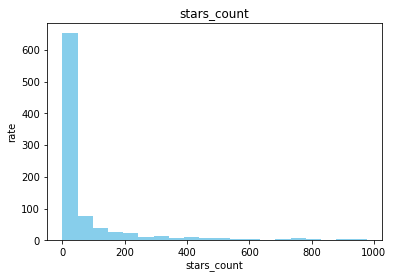

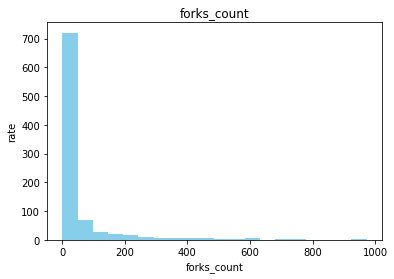

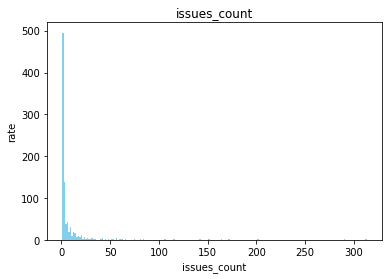

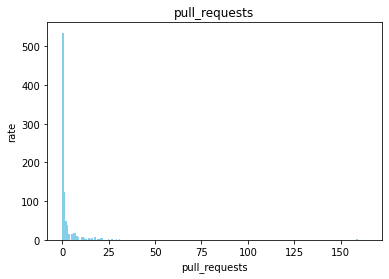

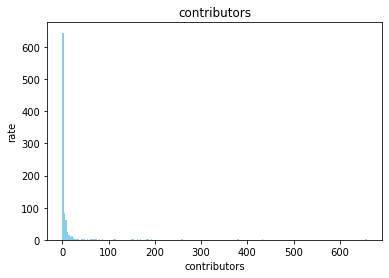

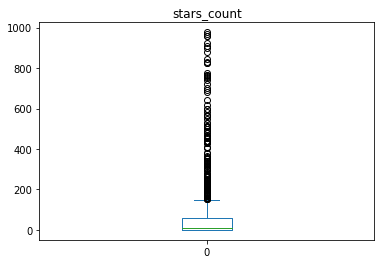

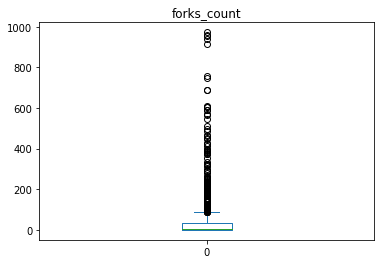

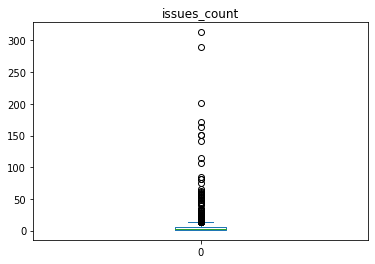

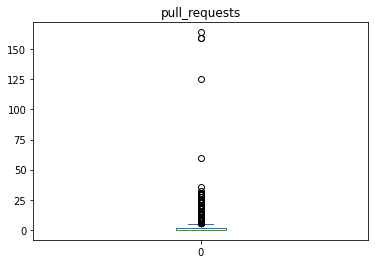

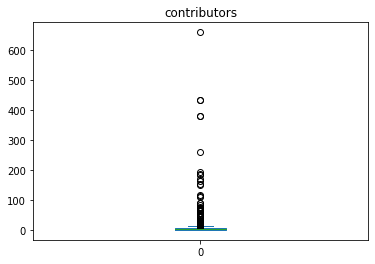

In [7]:
data1 = data1.dropna(axis=0, how='any')
f_d = 'github_dataset_d.csv'
data1.to_csv(f_d)
analysis_github(f_d)

数值属性前四个属性均值减小，contributoers均值增大，舍弃了较多的数据，但数据的分布模态未改变，标称属性的频数分布也基本保持不变。

- 用最高频率值来填补缺失值

data size: 1052
标称属性频数统计
----- repositories -----
kameshsampath/ansible-role-rosa-demos                        2
aloisdeniel/bluff                                            2
antoniaandreou/github-slideshow                              2
jgthms/bulma-start                                           2
artkirienko/hlds-docker-dproto                               2
artkirienko/int-null-even                                    2
KrauseFx/dotfiles                                            2
carloscuesta/gitmoji                                         2
divyamagwl/Depocalypse                                       2
ritwickdey/Cake-Shop                                         2
ritwickdey/expensify-app                                     2
stong/infosec-resources                                      2
KrauseFx/certs                                               2
KrauseFx/doesitrain.today                                    2
kameshsampath/ansible-role-kind                              2
ritwi

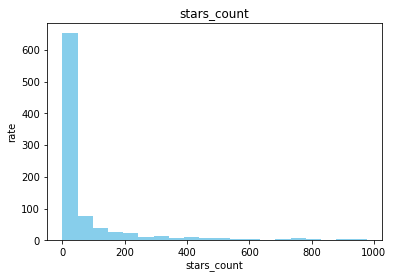

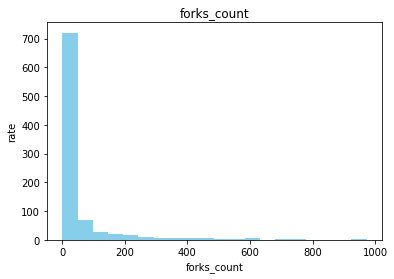

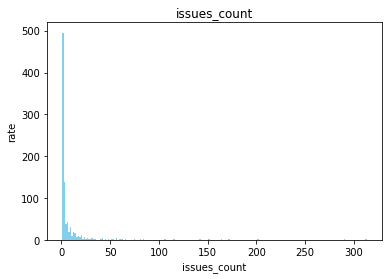

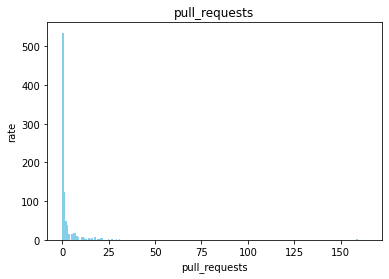

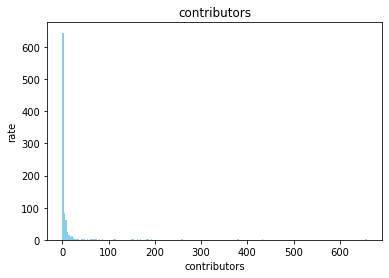

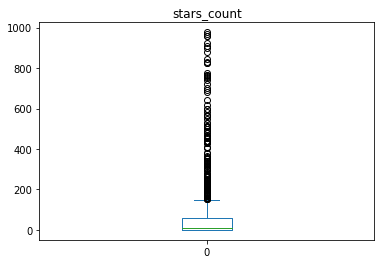

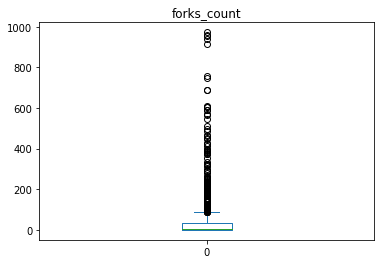

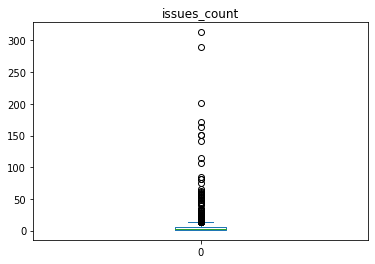

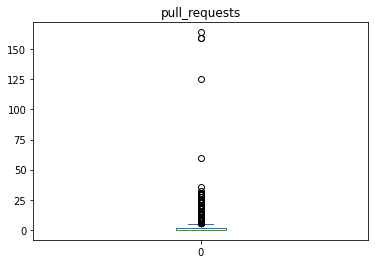

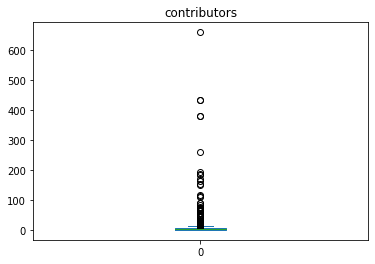

In [8]:
data = pd.read_csv(source_file1)
attributes = numeric_attributes + nominal_attributes
for attr in attributes:
    data[attr] = data[attr].fillna(data[attr].mode()[0])
print('data size:', len(data))
filename_m = './github_dataset_mode.csv'
data.to_csv(filename_m)
analysis_github(filename_m)

按频数对language进行填补，填补的数据为javascript，因此整体的频数分布保持相同的模态，javascript的频数增大。

- 通过数据对象之间的相似性以及属相间相关关系来填补缺失值

利用svm进行有监督学习，通过数值属性预测标称属性language，选择使用20次以上的语言数据。使用不包含缺失值的数据作为训练集，利用了数据对象之间的相似性，使用数据属性作为特征值表现了属性之间的相关关系。

['JavaScript', 'Python', 'HTML', 'Java', 'CSS', 'TypeScript', 'Dart', 'C++', 'Jupyter Notebook', 'Ruby', 'C', 'Shell']
{'JavaScript': 0, 'Python': 1, 'HTML': 2, 'Java': 3, 'CSS': 4, 'TypeScript': 5, 'Dart': 6, 'C++': 7, 'Jupyter Notebook': 8, 'Ruby': 9, 'C': 10, 'Shell': 11}
标称属性频数统计
----- repositories -----
kameshsampath/ansible-role-rosa-demos                        2
aloisdeniel/bluff                                            2
antoniaandreou/github-slideshow                              2
jgthms/bulma-start                                           2
artkirienko/hlds-docker-dproto                               2
artkirienko/int-null-even                                    2
KrauseFx/dotfiles                                            2
carloscuesta/gitmoji                                         2
divyamagwl/Depocalypse                                       2
ritwickdey/Cake-Shop                                         2
ritwickdey/expensify-app                                    

C:\Users\lbh\AppData\Local\Temp\ipykernel_13828\3425094125.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['language'] = train_data['language'].map(lang_dict)


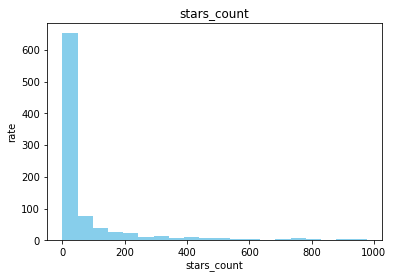

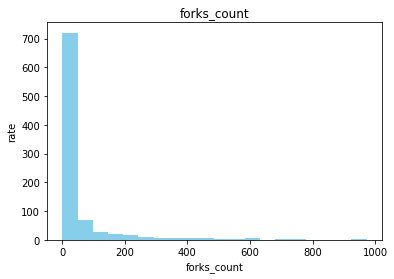

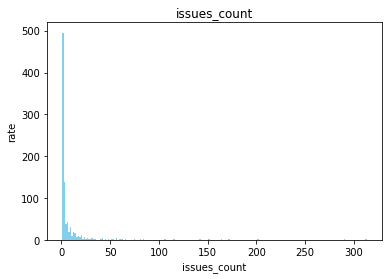

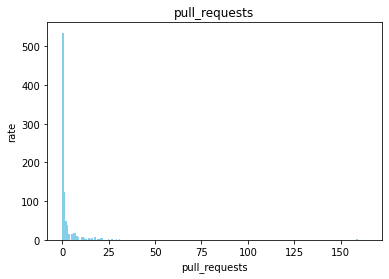

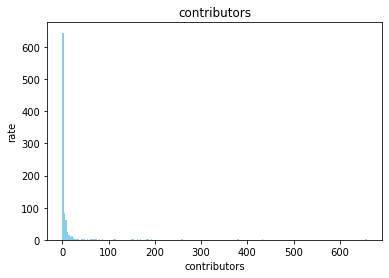

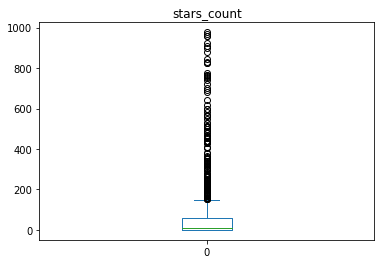

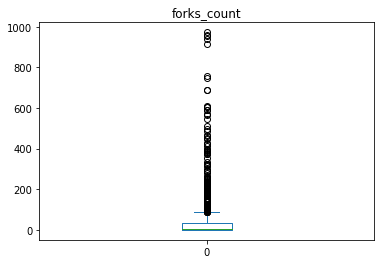

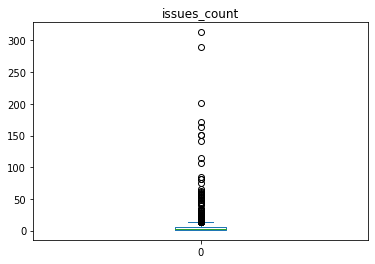

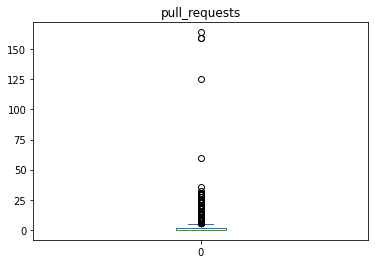

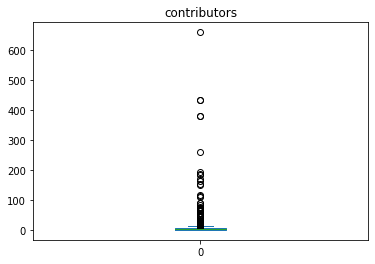

In [9]:
data = pd.read_csv(source_file1)
vc = data['language'].value_counts()
vc = vc.to_dict()
lang = []
for key in vc.keys():
    if vc[key] >= 20:
        lang.append(key)
print(lang)

lang_dict = {lang[i]:i for i in range(len(lang))}
print(lang_dict)

train_data = data.loc[data['language'].isin(lang)]

train_data['language'] = train_data['language'].map(lang_dict)

feature = numeric_attributes
trainX = np.array(train_data[feature])
trainY = np.array(train_data['language'])

model = SVC()
model.fit(trainX, trainY)

numeric_data = data[numeric_attributes]

predict_lang = data['language'].to_list()
for i in range(len(predict_lang)):
    if pd.isnull(predict_lang[i]):
        x = np.array(numeric_data.loc[i])
        predict = model.predict([x])
        predict_lang[i] = lang[predict[0]]

data['language'] = predict_lang
f_r = 'github_dataset_r.csv'
data.to_csv(f_r)
analysis_github(f_r)     

填补的数据主要为javascript，整体的频数分布保持相同的模态，javascript的频数增大。

## Movies Dataset from Pirated Sites
### 数据摘要和可视化
- 数据摘要

In [10]:
nominal_attributes = ['appropriate_for', 'director', 'industry', 'language', 'title', 'writer']
numeric_attributes = ['IMDb-rating', 'downloads', 'run_time', 'views']

source_file2 = "./movies_dataset.csv"

def analysis_moive_statistics(file, time_change=True, nominal_analysis = True):
    data = pd.read_csv(file)
    
    if nominal_analysis:
        # 标称属性频数统计
        print('=======================================')
        print('标称属性频数统计')
        for attr in nominal_attributes:
            print('-----', attr, '-----')
            vc = data[attr].value_counts()
            print(vc[:20])

        patten = re.compile(r'\d+')

    # 数值属性统计
    print('=======================================')
    print('缺失值统计')
    numeric_data = pd.DataFrame(data, columns=numeric_attributes)
    numeric_data.info()
    for i in numeric_attributes:
        print(i, "缺失值")
        print(numeric_data[i].isna().sum())
    print('=======================================')
    print('5数概括')
    print(numeric_data.describe(include='all'))

    run_time = pd.DataFrame(numeric_data, columns=['run_time'])
    if time_change:
        print('run time 5数概括')
        run_time = run_time.dropna(axis=0, how='any')
        run_time = run_time['run_time'].to_list()
        run_time_numeric = []
        for time in run_time:
            if time == np.nan:
                continue
            result = patten.findall(time)
            if len(result) > 1:
                run_time_numeric.append(int(result[0]) * 60 + int(result[1]))
            elif len(result) == 0:
                continue
            else:
                run_time_numeric.append(int(result[0]))
        run_time = pd.DataFrame({'run_time' : run_time_numeric})
        print(run_time.describe())
    return numeric_data, run_time

numeric_data, run_time = analysis_moive_statistics(source_file2)

标称属性频数统计
----- appropriate_for -----
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
Name: appropriate_for, dtype: int64
----- director -----
Venky Atluri           405
Simone Stock           403
Xavier Manrique        403
John Swab              205
Neil Jordan            205
Lindsay Hartley        203
Rohit Dhawan           203
Elegance Bratton       202
Nadira Amrani          202
Sean Lahiff            201
Bess Wohl              201
Aline Brosh McKenna    201
David Dhawan            32
Ram Gopal Varma         27
Vikram Bhatt            25
Steven Spielberg        24
Priyadarshan  

对于标称属性给出了每个可能取值的频数（由于部分数据过长无法全部显示，只显示前20个可能的取值，按频数降序排列），无法由describe函数对run_time属性进行统计计算，单独对该列数据进行处理之后进行了统计。


- 数据可视化

数据直方图

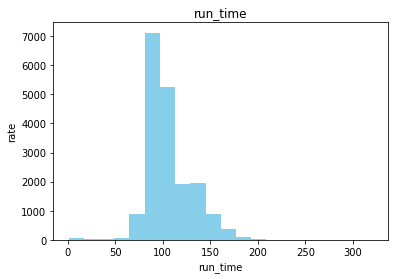

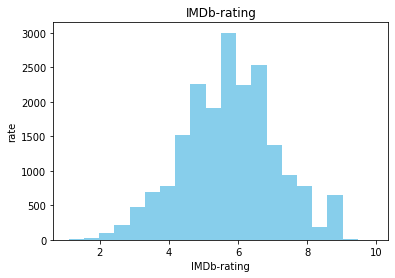

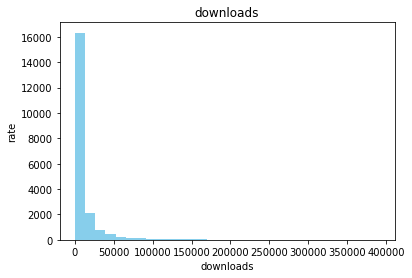

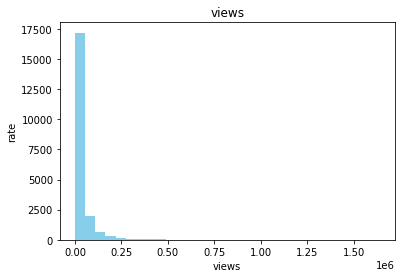

In [11]:
run_time_list = run_time['run_time'].to_list()
data_dict = {'run_time': run_time_list}
for i in ['IMDb-rating', 'downloads', 'views']:
    data_dict[i] = numeric_data[i].to_list()

bin_dict = {'run_time': 20, 'IMDb-rating':20, 'downloads':30, 'views':30}

draw_bar(data_dict, bin_dict)

盒图

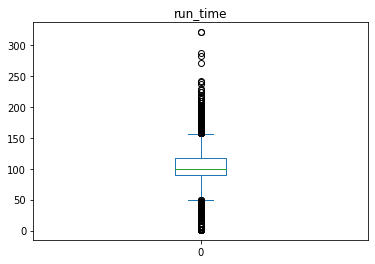

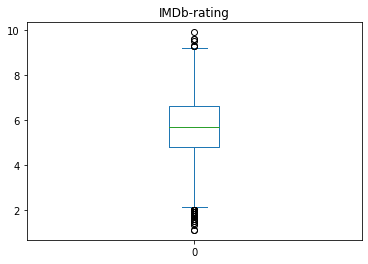

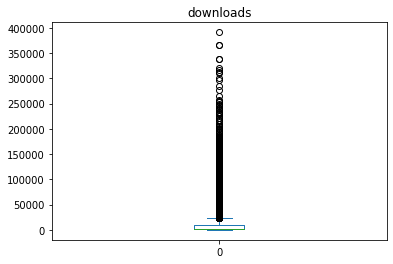

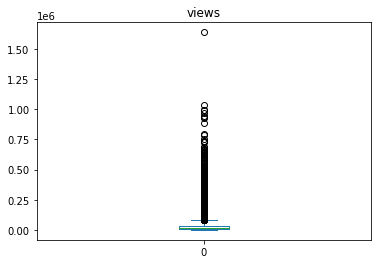

In [12]:
draw_box(data_dict)

数据分析：
由直方图得出四种数值属性的模态均为单峰Unimodal，由盒图得出IMDb-rating离群点较少，其余几组数据的离群点较多。
### 数据缺失的处理

- 将缺失部分剔除

In [13]:
data = pd.read_csv(source_file2)
data_backup = data.copy()
data_delete_nan = data_backup.dropna(axis=0, how='any')
print('Size', len(data_delete_nan))
filename_d = './movies_dataset_delete_nan.csv'
data_delete_nan.to_csv(filename_d)

Size 9902


标称属性频数统计
----- appropriate_for -----
R                 3873
Not Rated         1938
PG-13             1787
PG                 771
TV-14              664
TV-MA              384
Unrated            122
G                  120
TV-PG               88
TV-G                85
TV-Y7               35
TV-Y                15
Approved             7
NC-17                4
Passed               3
TV-Y7-FV             2
MA-17                1
TV-13                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64
----- director -----
Simone Stock           402
Neil Jordan            205
John Swab              203
Elegance Bratton       202
Aline Brosh McKenna    201
Steven Spielberg        24
David Dhawan            19
Ram Gopal Varma         17
Vikram Bhatt            16
Steven Soderbergh       16
Michael Bay             15
Ridley Scott            15
Renny Harlin            14
Puri Jagannadh          14
Priyadarshan            14
Robert Zemeckis         13
Sam Liu       

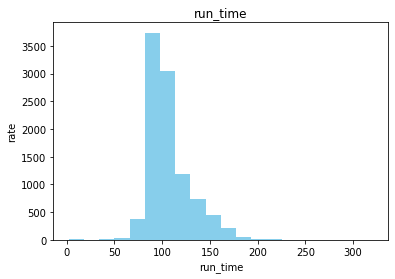

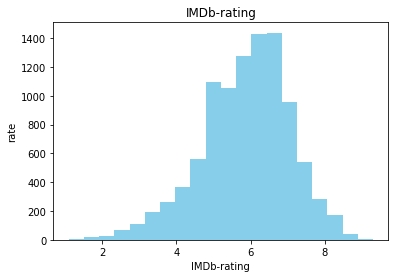

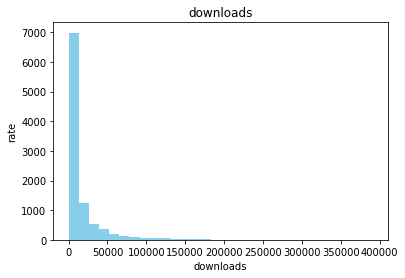

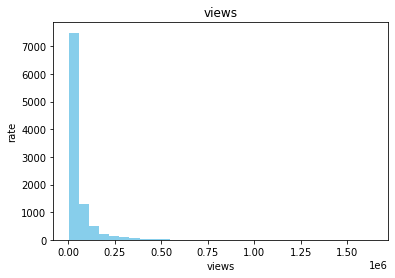

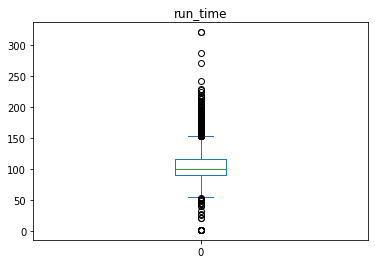

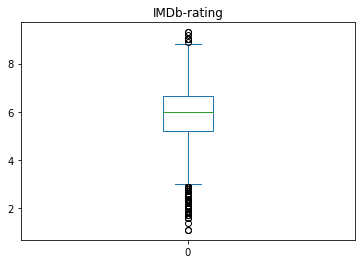

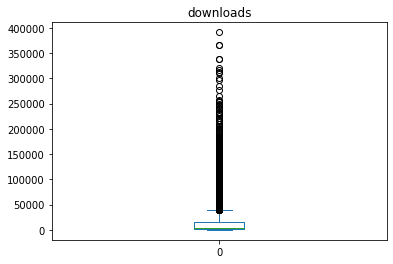

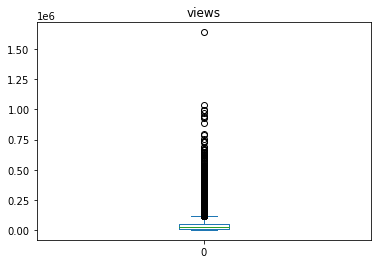

In [14]:
def analysis_moive(filename, time_change = True, nominal_analysis = True):
    numeric_data, run_time = analysis_moive_statistics(filename, time_change, nominal_analysis)
    run_time_list = run_time['run_time'].to_list()
    data_dict = {'run_time': run_time_list}
    for i in ['IMDb-rating', 'downloads', 'views']:
        data_dict[i] = numeric_data[i].to_list()
    bin_dict = {'run_time': 20, 'IMDb-rating':20, 'downloads':30, 'views':30}
    draw_bar(data_dict, bin_dict)
    draw_box(data_dict)

analysis_moive(filename_d)

数据集数据总量大幅减少，下载量和观看量均值变大，且变动幅度较大，评分和时长均值增大，但改变幅度较小，同时标准差均大幅增大。数据分布模态未改变。


数据缺失原因推测：猜测可能缺失导演、编剧等标称属性的数据为较冷门的电影，观看和下载数目较少，因此信息也不够完整，去除这部分数据对下载和观看的均值影响较大，但是电影的时长和评分基本在热门电影和冷门电影中的分布大体相同，所以对评分和时长影响较小。

- 用最高频率值来填补缺失值

20548
标称属性频数统计
----- appropriate_for -----
R                 13860
Not Rated          2142
PG-13              1968
PG                  886
TV-14               694
TV-MA               406
G                   152
Unrated             132
TV-PG               115
TV-G                 99
TV-Y7                45
TV-Y                 25
Approved              9
NC-17                 4
TV-Y7-FV              3
Passed                3
MA-17                 1
TV-13                 1
Drama                 1
Drama, Romance        1
Name: appropriate_for, dtype: int64
----- director -----
Venky Atluri           2343
Simone Stock            403
Xavier Manrique         403
John Swab               205
Neil Jordan             205
Lindsay Hartley         203
Rohit Dhawan            203
Elegance Bratton        202
Nadira Amrani           202
Sean Lahiff             201
Bess Wohl               201
Aline Brosh McKenna     201
David Dhawan             32
Ram Gopal Varma          27
Vikram Bhatt             25


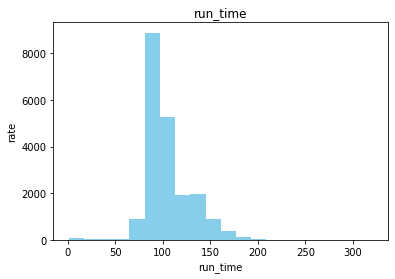

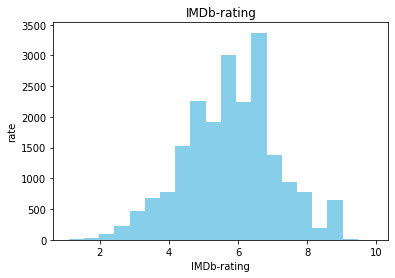

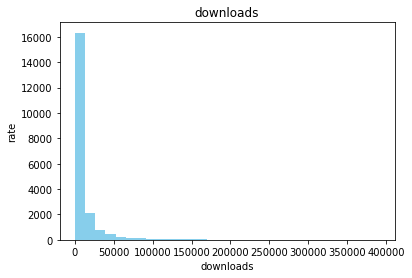

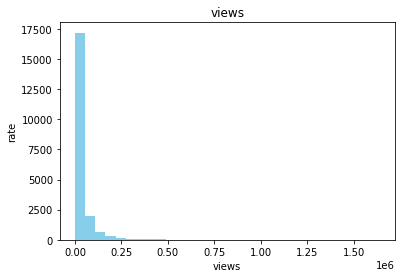

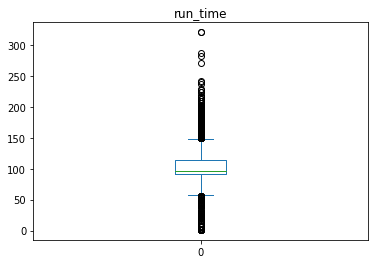

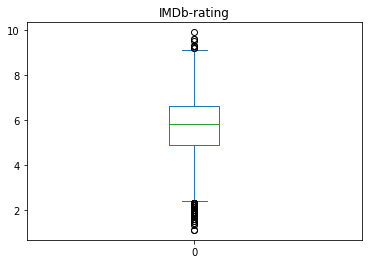

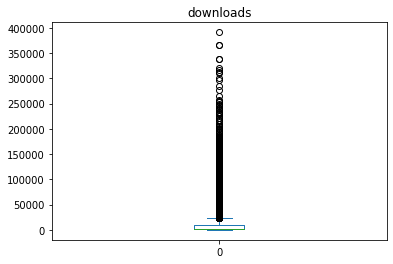

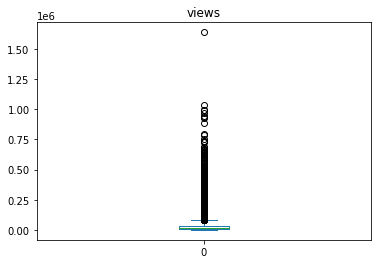

In [15]:
data = pd.read_csv(source_file2)
attributes = numeric_attributes + nominal_attributes
for attr in attributes:
    data[attr] = data[attr].fillna(data[attr].mode()[0])
print(len(data))
filename_m = './movies_dataset_mode.csv'
data.to_csv(filename_m)
analysis_moive(filename_m)

按频数进行填补后个数值属性数据5数描述和分布模态基本保持不变。

- 通过属性的相关关系来填补缺失值

通过downloads对IMDb-rating和run_time的线性拟合确定他们之间的线性关系，从而填补缺失值

缺失值统计
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb-rating  20548 non-null  float64
 1   downloads    20548 non-null  float64
 2   run_time     20548 non-null  float64
 3   views        20548 non-null  float64
dtypes: float64(4)
memory usage: 642.2 KB
IMDb-rating 缺失值
0
downloads 缺失值
0
run_time 缺失值
0
views 缺失值
0
5数概括
        IMDb-rating      downloads      run_time         views
count  20548.000000   20548.000000  20548.000000  2.054800e+04
mean       5.764879   10795.238916    105.563997  3.559551e+04
std        1.345705   23715.604860     23.300835  6.247090e+04
min        1.100000       0.000000      1.000000  6.670000e+02
25%        4.900000     855.750000     91.000000  7.571750e+03
50%        5.800000    2716.000000    101.000000  1.522250e+04
75%        6.600000   10073.250000    114.000000  3.656950e+04
max        9.900000  3

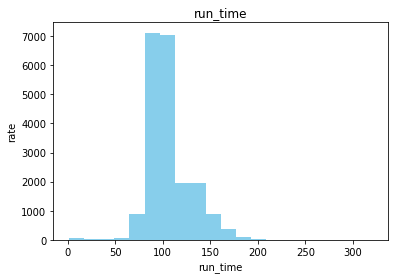

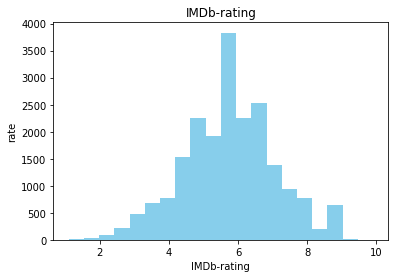

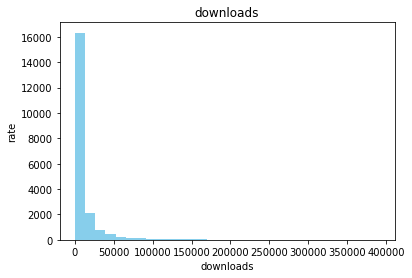

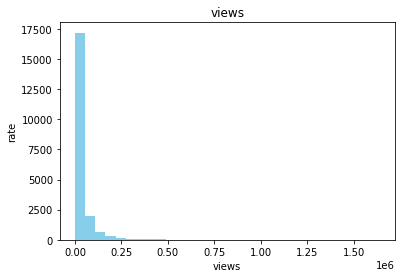

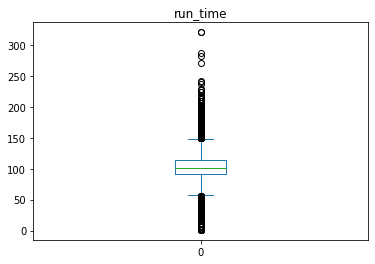

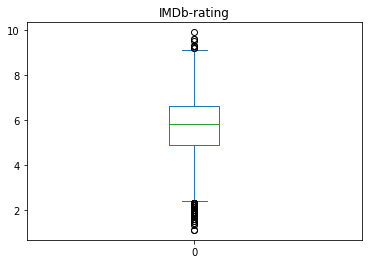

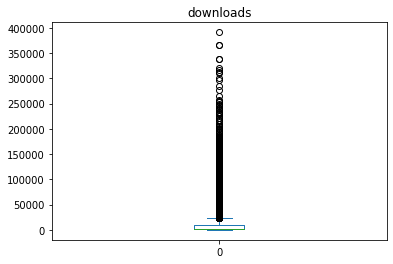

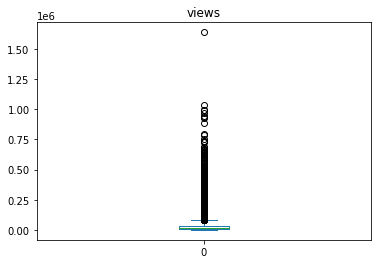

In [16]:
def time_swift(times):
    run_time_numeric = []
    for time in times:
        if time == np.nan:
            continue
        result = patten.findall(time)
        if len(result) > 1:
            run_time_numeric.append(int(result[0]) * 60 + int(result[1]))
        elif len(result) == 0:
            continue
        else:
            run_time_numeric.append(int(result[0]))
    return run_time_numeric

patten = re.compile(r'\d+')

data = pd.read_csv(filename_d)
downloads = data['downloads'].to_list()
IMDb_rating = data['IMDb-rating'].to_list()
run_time = data['run_time'].to_list()

size = len(downloads)

run_time = time_swift(run_time)

downloads = np.array(downloads).reshape(-1, 1)
IMDb_rating = np.array(IMDb_rating).reshape(-1, 1)
run_time = np.array(run_time).reshape(-1, 1)

model_for_rating = linear_model.LinearRegression()
model_for_rating.fit(downloads, IMDb_rating)

model_for_time = linear_model.LinearRegression()
model_for_time.fit(downloads, run_time)

data = pd.read_csv(source_file2)

# 由第一部分可知downloads和views仅缺失一值以平均数进行填充
data['downloads'] = data['downloads'].fillna(data['downloads'].mean())
data['views'] = data['views'].fillna(data['views'].mean())

downloads = np.array(data['downloads'].to_list())
IMDb_rating = np.array(data['IMDb-rating'].to_list())
run_time = np.array(data['run_time'].to_list())
for i in range(len(data)):
    result = patten.findall(run_time[i])
    if len(result) > 1:
        run_time[i] = (int(result[0]) * 60 + int(result[1]))
    elif len(result) == 0:
        run_time[i] = model_for_time.predict([[downloads[i]]])[0][0]
    else:
        run_time[i] = (int(result[0]))
    if pd.isnull(IMDb_rating[i]):
        IMDb_rating[i] = model_for_rating.predict([[downloads[i]]])

data['IMDb-rating'] = IMDb_rating
data['run_time'] = run_time

filename_l = './movies_dataset_linear.csv'
data.to_csv(filename_l)
analysis_moive(filename_l, time_change=False, nominal_analysis=False)

按照线性关系对评分和时长进行填充，均值和标准差改变幅度很小，数据分布模态保持单峰模态。

- 通过数据对象之间的相似性来填补缺失值

考虑到同一导演的水平相对稳定，对IMDb-rating和run_time的缺失值以该导演其他电影的均值进行填充；若导演缺失则依次以同一writer、industry、language、appropriate_for的电影均值进行填充。处理之后发现仍有部分数据未能填补缺失值，这部分数据导演、编剧、制片工厂、语言、推荐评级等信息均丢失，使用价值较低且数量相比于总量较少，因此予以舍弃。

In [17]:
data = pd.read_csv(source_file2)
_ = pd.DataFrame(data, columns=nominal_attributes)
_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   appropriate_for  11072 non-null  object
 1   director         18610 non-null  object
 2   industry         20547 non-null  object
 3   language         20006 non-null  object
 4   title            20547 non-null  object
 5   writer           18356 non-null  object
dtypes: object(6)
memory usage: 963.3+ KB


缺失值统计
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19930 entries, 0 to 19929
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb-rating  19930 non-null  float64
 1   downloads    19930 non-null  float64
 2   run_time     19930 non-null  float64
 3   views        19930 non-null  float64
dtypes: float64(4)
memory usage: 622.9 KB
IMDb-rating 缺失值
0
downloads 缺失值
0
run_time 缺失值
0
views 缺失值
0
5数概括
        IMDb-rating      downloads      run_time         views
count  19930.000000   19930.000000  19930.000000  1.993000e+04
mean       5.789657   11007.515103    106.659204  3.629024e+04
std        1.362058   24024.104421     24.488794  6.325043e+04
min        1.100000       0.000000      1.000000  6.670000e+02
25%        4.900000     910.250000     90.000000  7.692000e+03
50%        5.800000    2718.000000    101.000000  1.554500e+04
75%        6.600000   10325.750000    119.000000  3.723525e+04
max        9.600000  3

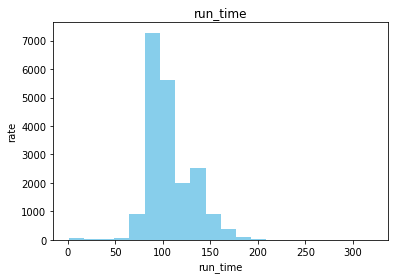

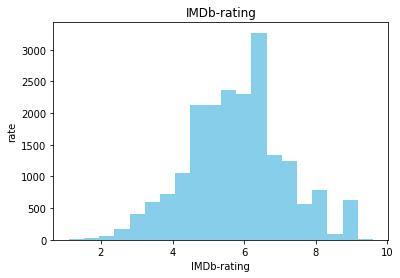

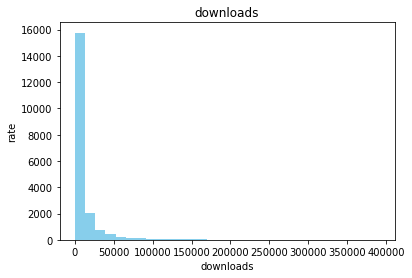

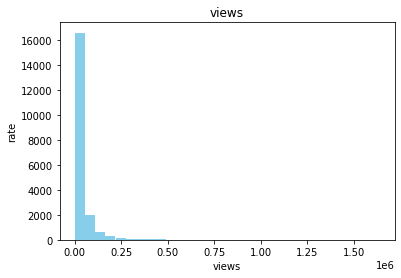

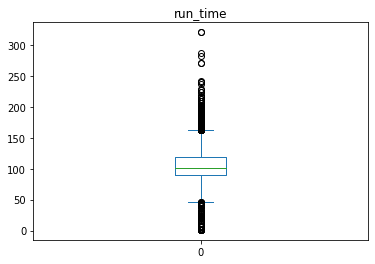

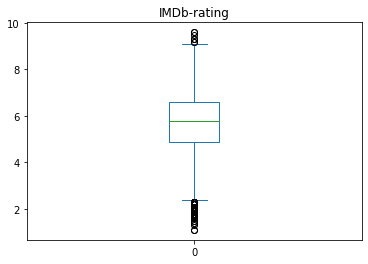

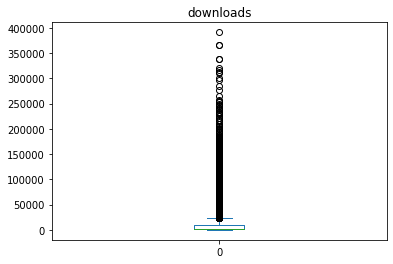

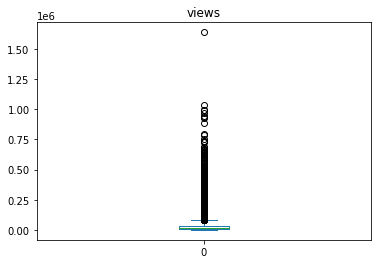

In [18]:
IMDb_rating = data['IMDb-rating'].to_list()
run_time = data['run_time'].to_list()

for i in range(len(run_time)):
    if pd.isnull(run_time[i]):
        continue
    result = patten.findall(run_time[i])
    if len(result) > 1:
        run_time[i] = (int(result[0]) * 60 + int(result[1]))
    else:
        run_time[i] = (int(result[0]))

data['run_time'] = run_time


for i in range(len(data)):
    director = data['director'][i]
    writer = data['writer'][i]
    industry = data['industry'][i]
    lang = data['language'][i]
    appropriate_for = data['appropriate_for'][i]
    if pd.isnull(IMDb_rating[i]):
        if not pd.isnull(director):
            IMDb_rating[i] = data[data['director'] == director]['IMDb-rating'].mean()
        elif not pd.isnull(writer):
            IMDb_rating[i] = data[data['writer'] == writer]['IMDb-rating'].mean()
        elif not pd.isnull(industry):
            IMDb_rating[i] = data[data['industry'] == industry]['IMDb-rating'].mean()
        elif not pd.isnull(lang):
            IMDb_rating[i] = data[data['language'] == lang]['IMDb-rating'].mean()
        else:
            IMDb_rating[i] = data[data['appropriate_for'] == appropriate_for]['IMDb-rating'].mean()
    
    if pd.isnull(run_time[i]):
        if not pd.isnull(director):
            run_time[i] = data[data['director'] == director]['run_time'].mean()
        elif not pd.isnull(writer):
            run_time[i] = data[data['writer'] == writer]['run_time'].mean()
        elif not pd.isnull(industry):
            run_time[i] = data[data['industry'] == industry]['run_time'].mean()
        elif not pd.isnull(lang):
            run_time[i] = data[data['language'] == lang]['run_time'].mean()
        else:
            run_time[i] = data[data['appropriate_for'] == appropriate_for]['appropriate_for'].mean()

data['IMDb-rating'] = IMDb_rating
data['run_time'] = run_time

data = data.dropna(axis=0, how='any', subset=['run_time', 'IMDb-rating'])

filename_r = 'movies_dataset_rela.csv'
data.to_csv(filename_r)

analysis_moive(filename_r, time_change=False, nominal_analysis=False)

均值和标准差改变幅度很小，数据分布模态保持单峰模态。